In [7]:
using JuMP, Plots, PyCall, CPLEX

In [8]:
pushfirst!(PyVector(pyimport("sys")."path"), "")
init  = pyimport("__init__")

PyObject <module '__init__' from '/home/harcenage/Documents/PFE/julia v2/__init__.py'>

In [9]:
include("./genetic_algorithm.jl")

genetic_algorithm (generic function with 1 method)

In [10]:
p = 35
t = 25
version = 1
println("p = ", p)
println("t = ", t)
file_path = "instances/instances_alpha0.8/rd_instance" * string(p) * "_" * string(t) * "_" * string(version) *".txt";
instance_dict = init.gen_instance(p,t, fp=file_path); 
instance_dict["P"] = 1:p;
instance_dict["T"] = 1:t;
instance_dict["t"] = t
instance_dict["p"] = p
alpha = instance_dict["alpha"]
cmax = instance_dict["cmax"]

p = 35
t = 25


1540

In [11]:
len_pop = 30
nbr_iteration = 2500
rst = true
@time begin
    result = genetic_algorithm(instance_dict, len_pop, nbr_iteration);
end
objectives, snd_objectives = result["objectives"], result["snd_objectives"];
trd_objectives, best_sol = result["trd_objectives"], result["best_sol"];

 80.246226 seconds (962.35 M allocations: 22.892 GiB, 4.60% gc time, 1.62% compilation time)


In [14]:
len = length(objectives)
plot(1:len, objectives, label = "", xlabelfontsize=8, ylabelfontsize=8, title="Evolution de la fonction objectif ", titlefontsize=10, lw=1, size=(700, 400))
xlabel!("Nombre d'itération")
ylabel!("Valeur de la fonction objectif")
plot!(size=(800,500))
savefig("img35-25-1-v2.png")

"/home/harcenage/Documents/PFE/julia v2/img35-25-1-v2.png"

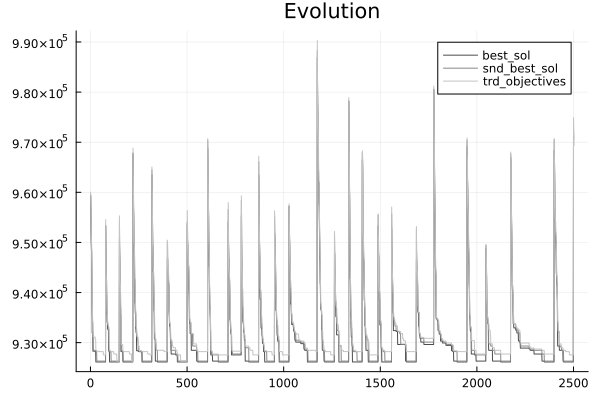

In [13]:
using Colors, ColorSchemes
mygrays = ColorScheme([RGB{Float64}(i, i, i) for i in 0.3:0.1:1.0])
len = length(objectives)
plot(1:len, [objectives,snd_objectives,trd_objectives], title="Evolution", label=["best_sol" "snd_best_sol" "trd_objectives"], lw=1; palette=palette(mygrays, 4))
#savefig("img.png")


In [14]:
println(best_sol.obj)
println(sum(best_sol.z))
l = []
for i in 1:p
    push!(l, sum(best_sol.y[i,:]))
end

println("Feasibility of solution : ", verify_solution(best_sol, instance_dict))
sz = best_sol.z
sc = construct_capacities(sz, t, alpha, cmax)
sy = best_sol.y
println("Maintenance : ",best_sol.z)
println("Surplus : ",best_sol.u) 
println("Matrice des setup : ")
display(best_sol.y)
println(l)


LoadError: UndefVarError: best_sol not defined

In [15]:
Any[5, 6, 4, 5, 6, 5, 5, 5, 6, 5]

10-element Vector{Any}:
 5
 6
 4
 5
 6
 5
 5
 5
 6
 5

In [34]:
# Données pour le graphe
x = 1:10
y1 = x.^2
y2 = 2x

# Création du graphe avec la légende
plot(x, y1, label="y = x^2")
plot!(x, y2, label="y = 2x")

# Ajout de la légende
legend = true

# Affichage du graphe
display(legend)

true